In [41]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, KFold

import matplotlib.pyplot as plt
import seaborn as sns
import gdown
import numpy as np
import math
from sklearn import preprocessing

In [42]:
# Load the CSV file
df = pd.read_csv('train.csv')

In [43]:
# Display the file
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [44]:
df.shape

(891, 12)

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [46]:
#Check for the missing values
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [47]:
# Handle missing values
# For 'Age', fill missing values with the median
df['Age'].fillna(df['Age'].median(), inplace=True)

# For 'Embarked', fill missing values with the most frequent embarkation port ('S')
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Drop the 'Cabin' column due to too many missing values
df.drop(columns=['Cabin'], inplace=True)

# Remove duplicates
df.drop_duplicates(inplace=True)

<ipython-input-47-4e526015c3af>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
<ipython-input-47-4e526015c3af>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try us

In [48]:
# Check for missing values after cleaning
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [49]:
# Data Transformation

# 5.1 Standardize numerical features
scaler = StandardScaler()
df['Age'] = scaler.fit_transform(df[['Age']])
df['Fare'] = scaler.fit_transform(df[['Fare']])

# 5.2 Encode categorical variables
# Encode 'Sex' as 0 (Male) and 1 (Female)
encoder = LabelEncoder()
df['Sex'] = encoder.fit_transform(df['Sex'])

# One-hot encode 'Embarked' column (creating dummy variables)
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)

# Drop irrelevant columns (e.g., 'Name', 'Ticket', 'PassengerId')
df.drop(columns=['Name', 'Ticket', 'PassengerId'], inplace=True)

In [50]:
# Check the transformed data
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,0,3,1,-0.565736,1,0,-0.502445,False,True
1,1,1,0,0.663861,1,0,0.786845,False,False
2,1,3,0,-0.258337,0,0,-0.488854,False,True
3,1,1,0,0.433312,1,0,0.420730,False,True
4,0,3,1,0.433312,0,0,-0.486337,False,True


In [51]:
# Data Splitting

# Define features (X) and target variable (y)
X = df.drop(columns=['Survived'])  # All features except 'Survived'
y = df['Survived']  # The target variable

# Split the dataset into training and testing sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)

Training set size: (712, 8)
Testing set size: (179, 8)


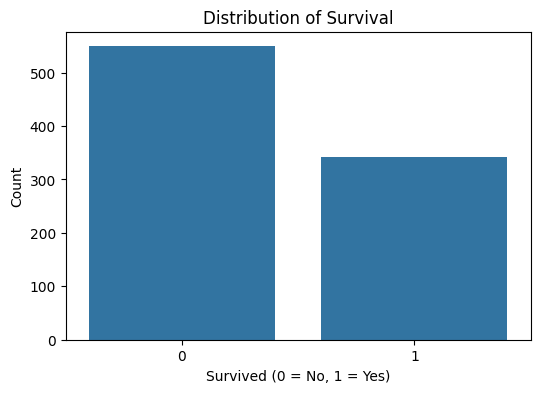

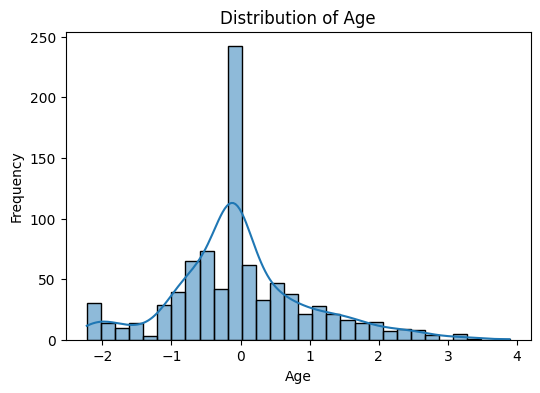

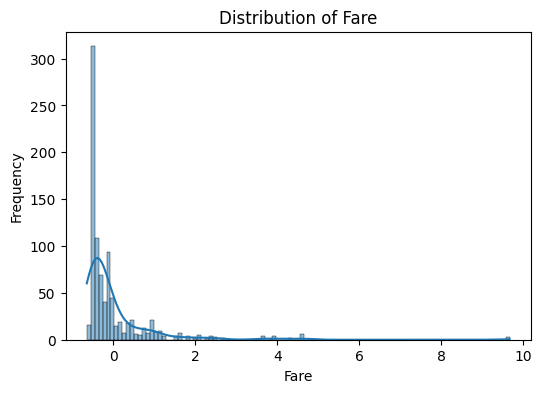

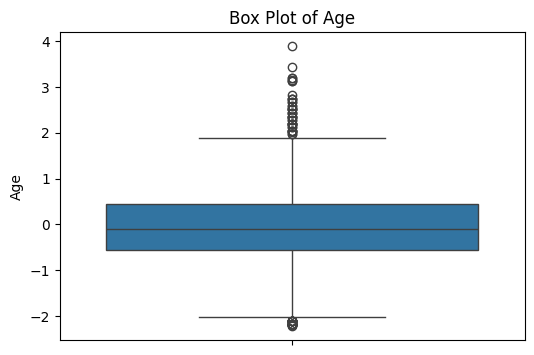

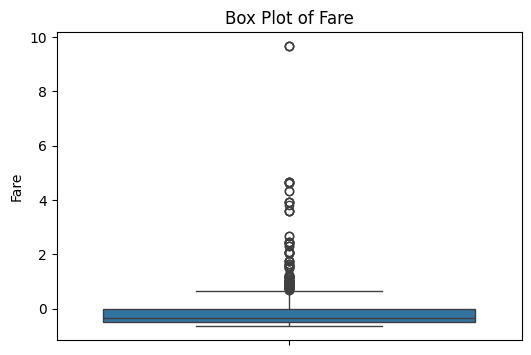

In [52]:
# Univariate Analysis
# Bar chart for the target variable ('Survived')
plt.figure(figsize=(6, 4))
sns.countplot(x='Survived', data=df)
plt.title('Distribution of Survival')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

# Histograms for numerical features
numerical_features = ['Age', 'Fare']  # List of numerical features
for feature in numerical_features:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

# Box plots for numerical features
for feature in numerical_features:
    plt.figure(figsize=(6, 4))
    sns.boxplot(y=df[feature])
    plt.title(f'Box Plot of {feature}')
    plt.ylabel(feature)
    plt.show()

In [53]:
# Calculate and print central tendencies and spread
for feature in numerical_features:
    mean = df[feature].mean()
    median = df[feature].median()
    mode = df[feature].mode()[0]  # Mode might have multiple values, taking the first
    variance = df[feature].var()
    std_dev = df[feature].std()

    print(f"Statistics for {feature}:")
    print(f"  Mean: {mean:.2f}")
    print(f"  Median: {median:.2f}")
    print(f"  Mode: {mode:.2f}")
    print(f"  Variance: {variance:.2f}")
    print(f"  Standard Deviation: {std_dev:.2f}")
    print("-" * 20)  # Separator

Statistics for Age:
  Mean: 0.00
  Median: -0.10
  Mode: -0.10
  Variance: 1.00
  Standard Deviation: 1.00
--------------------
Statistics for Fare:
  Mean: 0.00
  Median: -0.36
  Mode: -0.49
  Variance: 1.00
  Standard Deviation: 1.00
--------------------


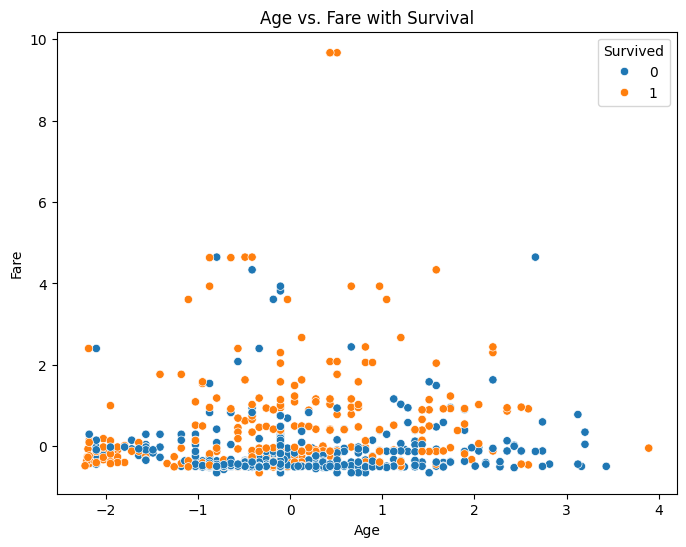

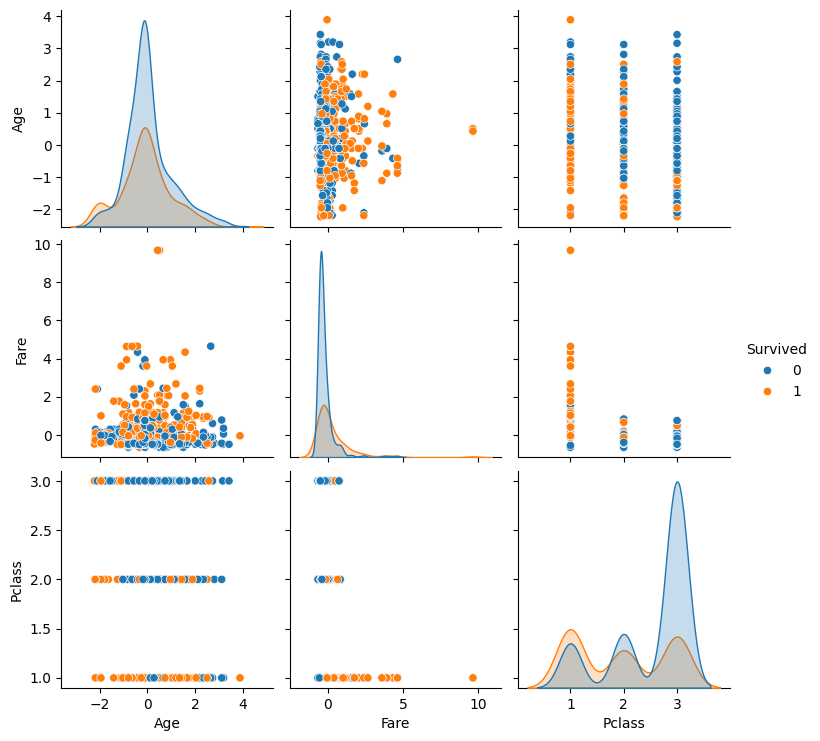

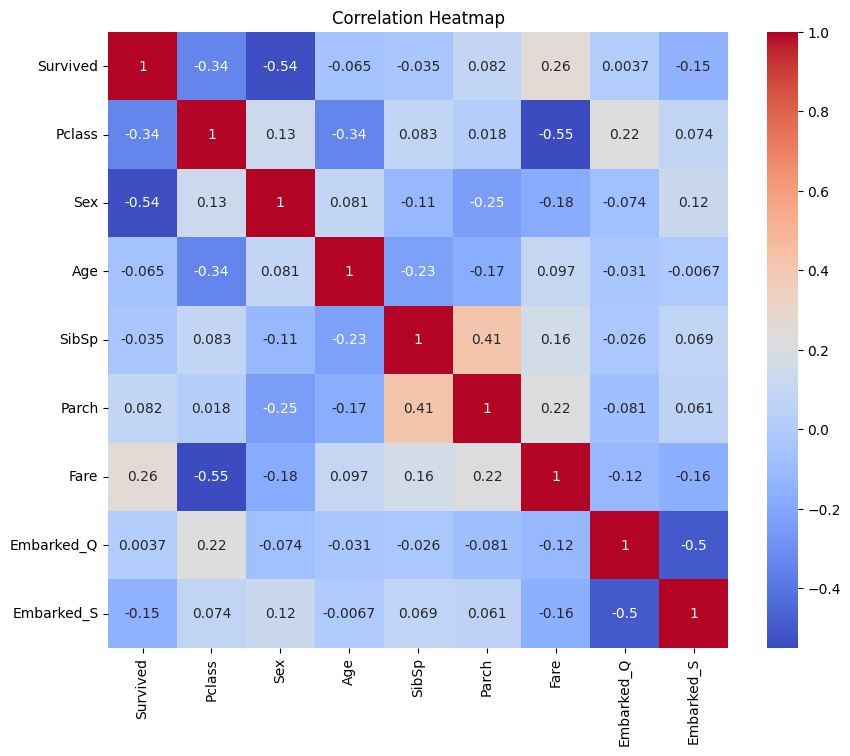

In [54]:
# Scatter plot for 'Age' vs. 'Fare' with 'Survived' as hue
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Age', y='Fare', hue='Survived', data=df)
plt.title('Age vs. Fare with Survival')
plt.show()

# Pair plot for selected features with 'Survived' as hue
sns.pairplot(df[['Age', 'Fare', 'Pclass', 'Survived']], hue='Survived')
plt.show()

# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()
# 1. Investigating Correlations and Multicollinearity
#- Examine the correlation heatmap: Look for features with high positive or negative correlation coefficients (close to +1 or -1). These features have a strong linear relationship.
#- Focus on correlations with the target variable ('Survived'): Identify features that have a strong correlation with 'Survived', as these are likely to be important predictors.
#- Address multicollinearity: If you find highly correlated features (e.g., correlation > 0.8 or < -0.8), consider removing one of them or combining them into a single feature to avoid redundancy and potential issues in modeling. You can use techniques like Principal Component Analysis (PCA) for dimensionality reduction if needed.

In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(),
    'SVM': SVC(),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Naive Bayes': GaussianNB()
}

# Train and evaluate each model
for model_name, model in models.items():
    model.fit(X_train, y_train)  # Train the model
    y_pred = model.predict(X_test)  # Make predictions on the test set

    # Evaluate performance
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print(f"Model: {model_name}")
    print(f"  Accuracy: {accuracy:.4f}")
    print(f"  Precision: {precision:.4f}")
    print(f"  Recall: {recall:.4f}")
    print(f"  F1-Score: {f1:.4f}")
    print("-" * 20)

Model: Logistic Regression
  Accuracy: 0.8101
  Precision: 0.7857
  Recall: 0.7432
  F1-Score: 0.7639
--------------------
Model: SVM
  Accuracy: 0.8156
  Precision: 0.8060
  Recall: 0.7297
  F1-Score: 0.7660
--------------------
Model: KNN
  Accuracy: 0.8156
  Precision: 0.7887
  Recall: 0.7568
  F1-Score: 0.7724
--------------------
Model: Decision Tree
  Accuracy: 0.7989
  Precision: 0.7639
  Recall: 0.7432
  F1-Score: 0.7534
--------------------
Model: Random Forest
  Accuracy: 0.8045
  Precision: 0.7671
  Recall: 0.7568
  F1-Score: 0.7619
--------------------
Model: Naive Bayes
  Accuracy: 0.7709
  Precision: 0.7200
  Recall: 0.7297
  F1-Score: 0.7248
--------------------
